## Predict if a passenger survived or not

In [1]:
import sys
#Change path
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\Titanic')

#Do all imports
from Titanic import *
from Titanic.config import *

In [381]:
data = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
full_data = [data,test]

# Exploratory data analysis

## i. Shape of data

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [55]:
data.shape,test.shape

((891, 12), (418, 11))

In [56]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
def get_col_names(data):
    """This function segregates and returns the continous and categorical column names in the dataframe passed"""
    continous_names = []
    categ_names = []
    for i in data.columns:
        continous_names.append(i) if data.loc[:,i].dtypes in ['int64','int32','float32','float64'] \
        else categ_names.append(i)
    return continous_names,categ_names

## ii. Missing value analysis


In [64]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Missing value percentages
Let us see percentage wise and drop column if >30% is missing

In [65]:
#get the rows with null values
missing_values = pd.DataFrame(data.isnull().sum())
#rename the columns old value: 0, new_value:'missing_per'
missing_values = missing_values.rename(columns = {'index':'variable', 0:'missing_per'})
missing_values['missing_per'] = (missing_values['missing_per']/len(data))*100
missing_values

,missing_per
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


#### Insight:  
Cabin is 77% missing..--->>>>>>>    Drop Cabin
    

### Missing value imputation

In [69]:
#NOTE - Let us take a subset of valid dataset and compute if mean, median or knnimpute fits the best

#get data for which age is not null
data[data['Age'].isnull() == False].head(2)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_size,is_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,2,0


### Choose mean or median?
#data.iloc[1]['Age'] = 38.0

-----------Now set set to null
data['Age'].loc[1] = np.nan

------calculated this cell using mean and median
#mean = 29.68 data['Age'].mean()
#median = 28 data['Age'].median()
#### FINDING:
    Choose mean as it is giving the closest value

In [382]:
# Imputation
for i,dataset in enumerate(full_data):
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
   

## iii. Analysis of columns

In [383]:
#Let us get the glimpse of continous and categorical column features we have
continous_names, cat_names = get_col_names(data)
print('-----Summary of columns')
print('Total col -',data.shape[1] )
print('-------------------------')
print('continous -', len(continous_names))
print(data[continous_names].head(1))
print('-------------------------')
print('-------------------------')
print('categorical  -', len(cat_names))
print(data[cat_names].head(1))
print('-------------------------')
#PS:#iloc To be used for column index and loc when you have column name instead


-----Summary of columns
Total col - 12
-------------------------
continous - 7
   PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare
0            1         0       3  22.0      1      0  7.25
-------------------------
-------------------------
categorical  - 5
                      Name   Sex     Ticket Cabin Embarked
0  Braund, Mr. Owen Harris  male  A/5 21171   NaN        S
-------------------------


## iv. Outlier analysis for continous variables

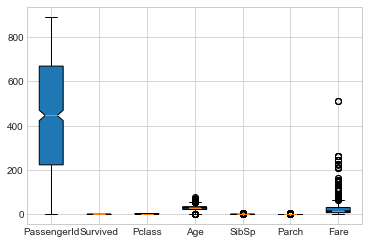

In [8]:
plot = []
for i in continous_names:
    plot.append(list(data.loc[:,i]))
plt.boxplot(plot, notch = 'True', patch_artist= True, labels=continous_names)
plt.show()

### FINDING: 
A lot of outliers in age, fare..Lets remove those

In [200]:
#data = full_data[0]
for i in continous_names:
    if i == 'Survived': 
        continue
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75 - q25
    min = q25 - (iqr* 1.5)#lower fence
    max = q25 + (iqr* 1.5)#upper fence
    
    
    print('-----Thes will be replaced for col :',i,'\n',data[data.loc[:,i] >max].head())
    print(min,max)
    #data = data.drop(data[data.loc[:,i] <min].index)
    #data = data.drop(data[data.loc[:,i] > max].index)
    #test = test.drop(data[data.loc[:,i] <min].index)
    #test = test.drop(data[data.loc[:,i] > max].index)
    #data.loc[data.loc[:,i]>max, i] = data.loc[:,i].mean()
    #data.loc[data.loc[:,i]<min, i] = data.loc[:,i].mean()
    #test.loc[test.loc[:,i]>max, i] = test.loc[:,i].mean()
    #test.loc[test.loc[:,i]<min, i] = test.loc[:,i].mean()
    

-----Thes will be replaced for col : PassengerId 
 Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
-444.0 891.0
-----Thes will be replaced for col : Pclass 
 Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
0.5 3.5
-----Thes will be replaced for col : Age 
     PassengerId  Survived  Pclass                              Name     Sex  \
6           7.0         0     1.0           McCarthy, Mr. Timothy J    male   
11         12.0         1     1.0          Bonnell, Miss. Elizabeth  female   
15         16.0         1     2.0  Hewlett, Mrs. (Mary D Kingcome)   female   
33         34.0         0     2.0             Wheadon, Mr. Edward H    male   
35         36.0         0     1.0    Holverson, Mr. Alexander Oskar    male   

     Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
6   54.0      0      0       17463  51.8625   E

#### finding
Most of the outliers are actually on Age,parch,fare.
But Age can have these values, and actually should be converted to catgeorical value instead
Fare also can have high values, since we it depends on the family size which is travelling(since fare can be cumulutaive)
So let us derive info out of these and make these categorical

### NOTE
Outlier analysis is actually done on continious range variables not the ones which has fewer unique values and they have good chance of being categorical

In [11]:
full_data=[data,test]
data.shape,test.shape


((891, 12), (418, 11))

## Lets get some answers
Now that basic missing values are handled and outliers are even taken care of, let us stop and get some answers from data

### a. Did boarding point had any relation with survival rate?

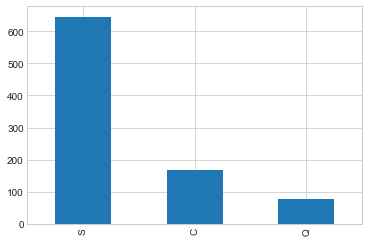

In [14]:
data.Embarked.value_counts().plot.bar()
#majority boarded from Southampton

(0.33900928792569657, 0.5535714285714286, 0.38961038961038963)

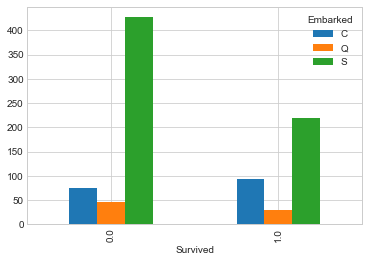

In [50]:
data.groupby('Embarked')['Survived'].value_counts().unstack(0).plot.bar()
surv_rate_emb_s = (data[data.Embarked=='S']['Survived'].value_counts()[1])/len(data[data.Embarked=='S'])
surv_rate_emb_c = (data[data.Embarked=='C']['Survived'].value_counts()[1])/len(data[data.Embarked=='C'])
surv_rate_emb_q = (data[data.Embarked=='Q']['Survived'].value_counts()[1])/len(data[data.Embarked=='Q'])
surv_rate_emb_s ,surv_rate_emb_c,surv_rate_emb_q

### what it implies?
survival rate of people boarding from Cherbourg is the most with 55 %

### b. Did it depend on gender

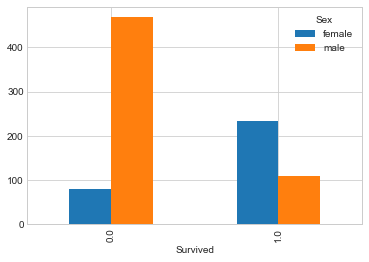

In [52]:
data.groupby('Sex')['Survived'].value_counts().unstack(0).plot.bar()

#### FINDING:
overall female survived more

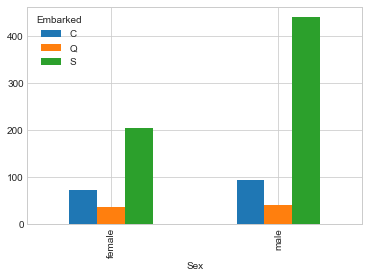

In [57]:
data.groupby('Embarked')['Sex'].value_counts().unstack(0).plot.bar()

#### FINDING:
More male boarded from Southampton and would explain the less survival rate

roughly equal from cherbourg and equal at Queens

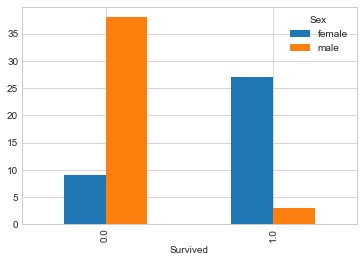

In [84]:
data[data.Embarked=='Q'].groupby('Sex')['Survived'].value_counts().unstack(0).plot.bar()

#### FINDING:
Male survived very less who boarded from Queens

male      95
female    73
Name: Sex, dtype: int64

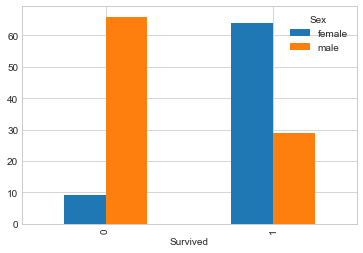

In [123]:
data[data.Embarked=='C'].groupby('Sex')['Survived'].value_counts().unstack(0).plot.bar()
data[data.Embarked=='C']['Sex'].value_counts()

In [ ]:
data[data.Embarked=='C'].groupby

C:\Users\PAT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



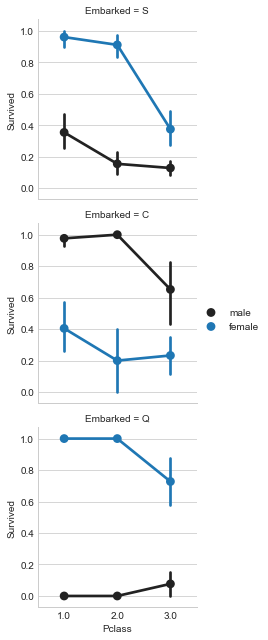

In [121]:
grid = sb.FacetGrid(data, row='Embarked')
grid.map(sb.pointplot, 'Pclass','Survived','Sex',order=None,hues=None)
grid.add_legend()

## d. Did Passenger class impact survival

C:\Users\PAT\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



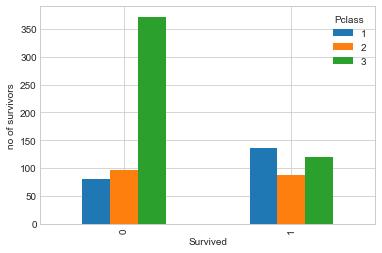

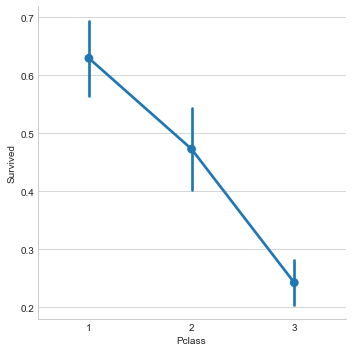

In [375]:
data.groupby('Pclass').Survived.value_counts().unstack(0).plot.bar()
plt.ylabel('no of survivors')
sb.factorplot('Pclass','Survived',data=data)

#### FINDING:
Pclass 1 survived the most(percentage wise)

## 5. Feature engineering
Derive information from sibsp and parch

In [384]:
#bk_full_data = full_data #back up purposes

#Preprocessing to be done for both train and test data in the following loop
full_data = [data,test]
for i,dataset in enumerate(full_data):
    dataset = dataset.drop(['Cabin','PassengerId'],axis=1)
    #print(dataset.head(1))
    dataset['family_size'] = (np.ceil(dataset['SibSp'])) + (np.ceil(dataset['Parch'])) + 1
    dataset = dataset.drop(['SibSp', 'Parch'], axis = 1)
    dataset['is_alone'] = 0 #Initialize value of this var/col
    dataset.loc[dataset['family_size'] ==1 , 'is_alone'] = 1 #set to 1/True if family size is 1 or else 0(intialize value)
    dataset['is_alone'] = dataset['is_alone'].astype('object')
    if i == 0:#update the original df 
        data = dataset 
    else:
        test = dataset
#update continous variables also, since these col are already dropped from the dataframe
continous_names.append('family_size')
continous_names.remove('PassengerId')
continous_names = [ x for x in continous_names if x not in ['SibSp', 'Parch']]
cat_names.remove('Cabin')
cat_names.append('is_alone')


full_data = [data,test]#Update the list

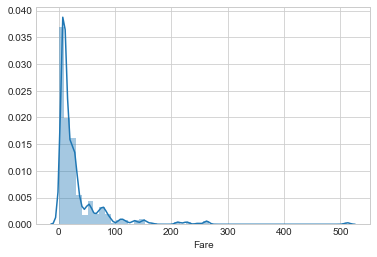

In [247]:
sb.distplot(data.Fare)

In [268]:
#If we had a normal distribution, then confidence interval could be used
confidence_interval = data.Fare.mean()-2*(data.Fare.std()/np.sqrt(len(data))),data.Fare.mean()+2*(data.Fare.std()/np.sqrt(len(data)))
confidence_interval

(28.874622974571245, 35.533792962577955)

In [385]:
bk = data.copy()

## convert continous to categorical variables

In [283]:
#pd.DataFrame({'1':pd.qcut(data.Fare, 6,labels=[1,2,3,4,5,6]),
#             '2':data.Fare})
pd.qcut(data.Fare, 5).head(2)

0      (-0.001, 7.854]
1    (39.688, 512.329]
Name: Fare, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [386]:
full_data = [data,test]
for dataset in full_data:
    #fare is in floating values, lets map to categories(see categorical_fare for binning ranges),but still int
    dataset.loc[dataset['Fare'] <= 7.85,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.85) & (dataset['Fare'] <= 10.54),'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.54) & (dataset['Fare'] <= 21), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21) & (dataset['Fare'] <= 39), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39, 'Fare'] = 4
    
    dataset.Fare = dataset.Fare.astype('str')
    dataset.loc[dataset.Fare == '0.0','Fare'] = 'extremely_low'
    dataset.loc[dataset.Fare == '1.0','Fare'] = 'low'
    dataset.loc[dataset.Fare == '2.0','Fare'] = 'medium'
    dataset.loc[dataset.Fare == '3.0','Fare'] = 'high'
    dataset.loc[dataset.Fare == '4.0','Fare'] = 'extremely_high'
    
    #same with age
    dataset.Age = dataset.Age.astype('int')
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 33), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 4
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 5
    dataset.Age = dataset.Age.astype('str')
    dataset.loc[dataset.Age == '0','Age'] = 'children'
    dataset.loc[dataset.Age == '1','Age'] = 'teens'
    dataset.loc[dataset.Age == '2','Age'] = 'adults'
    dataset.loc[dataset.Age == '3','Age'] = 'middle age'
    dataset.loc[dataset.Age == '4','Age'] = 'senior'
    dataset.loc[dataset.Age == '5','Age'] = 'retired'
    
cat_names.append('Age')    
cat_names.append('Fare')    


In [330]:
full_data[0]['Fare'].dtype,bk.Fare.dtype
data.Fare.value_counts()

low               198
extremely_high    185
high              176
medium            166
extremely_low     166
Name: Fare, dtype: int64

In [331]:
data.Age.value_counts()

adults        501
senior        126
middle age    103
teens          75
children       64
retired        22
Name: Age, dtype: int64

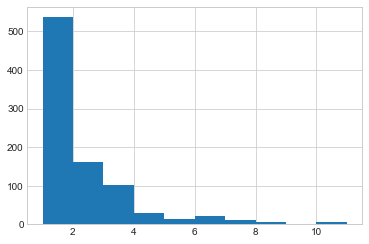

In [135]:
data.family_size.hist()

## c. Did it depend on family size

C:\Users\PAT\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



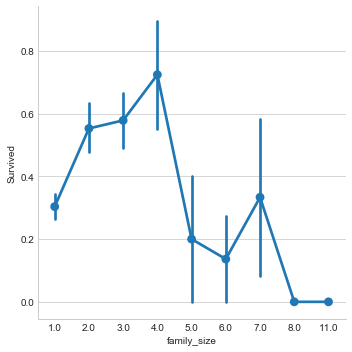

In [138]:
sb.factorplot('family_size','Survived',data=data)

#### FINDING:
people with 4 members survived more(could fit on small lifeboat and be rescued), along with size 1,2

## chi-square analysis for categorical
#Hypothesis H0(NUll hypothesis)- Relation b/w all IV variable(seperately) and dependent(outlet_sales) is said to be independent of each other
#H1- says that the Relation b/w all IV variable(seperately) and dependent(outlet_sales) is said to be dependent on each other
#if p-val>0.05 the H0 is accepted, signifiying that there is no significant relation and they are independent and hence we can drop that var
#if p-val <0.05 H0 is rejected and H1 is accepted and we can include the var, since
#they are dependent and can explain the DV significantly

In [394]:
#data = full_data[0]
#test = full_data[1]
skip_list = []
for i in cat_names:
    chi2, p, dof,ex = chi2_contingency(pd.crosstab(data['Survived'], data[i]))
    if(p<0.05):#H1 accepted
        print('accept -pvalue %f %s'%(p,i))
        
    else:
        print('skip -p value %f %s'%(p,i))
        skip_list.append(i)
data = data.drop(skip_list,axis=1)
test = test.drop(skip_list,axis=1)
print('Deleted skip col')
#Remove irrelevant categorical variables
cat_names = [ x for x in cat_names if x not in skip_list]
full_data = [data,test]

accept -pvalue 0.000000 Sex
accept -pvalue 0.000002 Embarked
accept -pvalue 0.000000 is_alone
Deleted skip col


In [395]:
data.head(1)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_size,is_alone
0,0,3,"Braund, Mr. Owen Harris",male,adults,extremely_low,S,2.0,0


In [89]:
data.describe()

,Survived,Pclass,Age,Fare,family_size
count,484.000000,484.000000,484.000000,484.000000,484.000000
mean,0.293388,2.628099,27.146238,11.697089,1.163223
std,0.455786,0.618985,6.271089,7.044375,0.369952
min,0.000000,1.000000,4.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,7.750000,1.000000
50%,0.000000,3.000000,29.699118,8.050000,1.000000
75%,1.000000,3.000000,29.699118,13.000000,1.000000
max,1.000000,3.000000,41.000000,35.500000,2.000000


## FINDING
min Fare says 0 let's do some analysis


Text(0, 0.5, 'Count of fare 0')

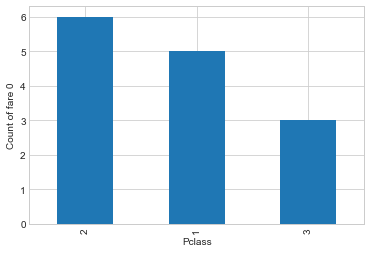

In [93]:
data[data['Fare']==0].Pclass.value_counts().plot.bar()
plt.xlabel('Pclass')
plt.ylabel('Count of fare 0')

## FINDING
Either Class 2 dint pay prices or its just missing :)

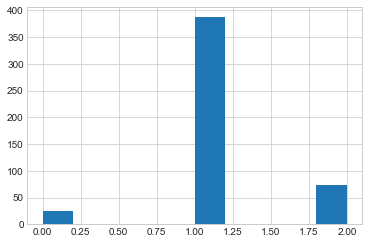

In [95]:
#data.groupby('Age').Survived.count().plot.bar()
data['Age'].hist()

Text(0, 0.5, 'no of survivors')

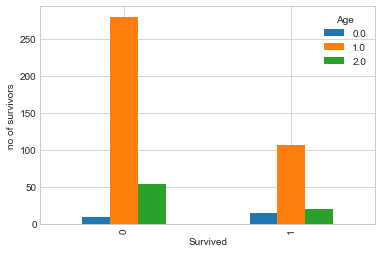

In [97]:
data.groupby('Age').Survived.value_counts().unstack(0).plot.bar()
plt.ylabel('no of survivors')

In [171]:
child = data[data['Age'] == 0]
adult =  data[data['Age'] == 1]
middle =  data[data['Age'] == 2]
child_surv = child[child['Survived'] == 1]
adult_surv = adult[adult['Survived'] == 1]
middle_surv = middle[middle['Survived'] == 1]
print("Per of child survived ",(len(child_surv)/len(child))*100)
print("Per of adult survived ",(len(adult_surv)/len(adult))*100)
print("Per of middle age survived ",(len(middle_surv)/len(middle))*100)

Per of child survived  62.5
Per of adult survived  27.648578811369507
Per of middle age survived  27.397260273972602


## Insight
Children survived the most, so age is significant for survival

## Correlation analysis

AxesSubplot(0.125,0.1925;0.62x0.62)


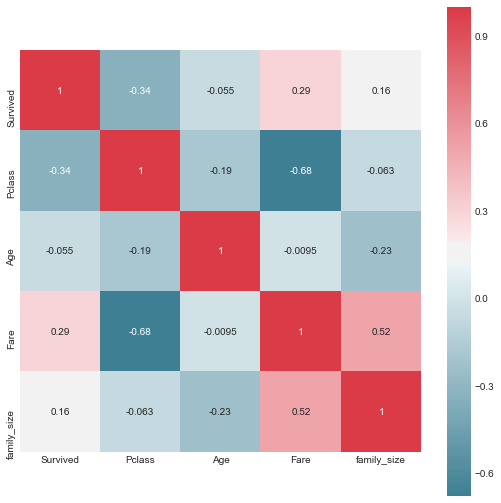

In [207]:
f,ax=plt.subplots(figsize=(9,9))
corr = data.loc[:,continous_names].corr()
print(sb.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220,10,as_cmap=True),
            square =True,ax=ax,annot = True))

In [210]:
#data['Fare']data[data['Fare']==0]
#data.describe()
#data['Survived'] = data['Survived'].astype('int')
continous_names, cat_names = get_col_names(data)
print('-----Summary of columns')
print('Total col -',data.shape[1] )
print('continous are -', len(continous_names))
print(data[continous_names].head(1))
print('-----')
print('categorical are -', len(cat_names))
print(data[cat_names].head(1))

-----Summary of columns
Total col - 8
continous are - 5
   Survived  Pclass   Age  Fare  family_size
0         0     3.0  22.0  7.25          2.0
-----
categorical are - 3
    Sex Embarked is_alone
0  male        S        0


count    484.000000
mean       0.795455
std        0.786467
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Fare, dtype: float64


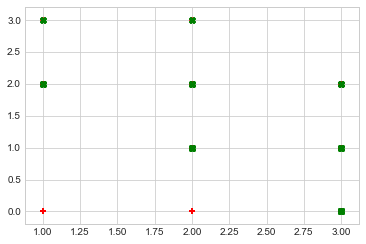

In [101]:
#lets see how is the decision boundary going to be
df0 = data[data['Survived'] == 0]
df1 = data[data['Survived'] == 1]
print(data.Fare.describe())
plt.scatter(df0['Pclass'], df0.Fare, marker='+',color='red')
plt.scatter(df1['Pclass'], df1.Fare, marker='X',color='green')

In [102]:
data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size,is_alone
0,0,3,male,1.0,0.0,S,2,0
2,1,3,female,1.0,1.0,S,1,1


## lets plot some bar graphs for categorical variables

Text(0, 0.5, 'avergae survivors')

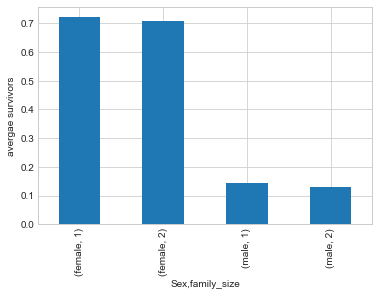

In [104]:
##Sex,family size and survival
data.groupby(['Sex','family_size'])['Survived'].mean().plot.bar()
plt.ylabel('avergae survivors')


## Insight
female survived more irrespective of family size

Text(0, 0.5, 'avergae survivors')

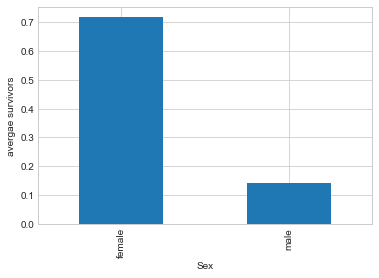

In [106]:
#Sex and survival
#Graphical
data.groupby(['Sex'])['Survived'].mean().plot.bar()
plt.ylabel('avergae survivors')

In [107]:
#mathematical
male = data[data['Sex'] == 'male']
female = data[data['Sex'] == 'female']
male_sur = male[male['Survived'] == 1]
female_sur = female[female['Survived'] == 1]
print('Total males--',len(male), 'Total females-- ',len(female))
print('No of male survivors---',len(male_sur),'No of female survivors---',len(female_sur))
print('per of male survivors---',len(male_sur)/len(male)*100,'No of female survivors---',len(female_sur)/len(female)*100)

Total males-- 357 Total females--  127
No of male survivors--- 51 No of female survivors--- 91
per of male survivors--- 14.285714285714285 No of female survivors--- 71.65354330708661


## Insight
Female survived more

In [394]:
sur =data[data['Survived'] == 1]
non_sur =data[data['Survived'] == 0]
male_surv = sur[sur['Sex'] == 'male']
female_surv = sur[sur['Sex'] == 'female']
male_non_surv = sur[sur['Sex'] == 'male']
female_non_surv = sur[sur['Sex'] == 'female']

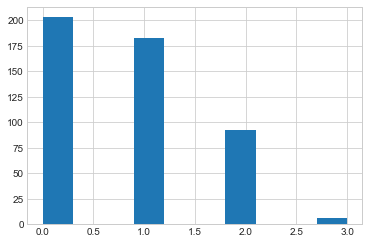

In [108]:
#Lets look at fare
data['Fare'].hist()

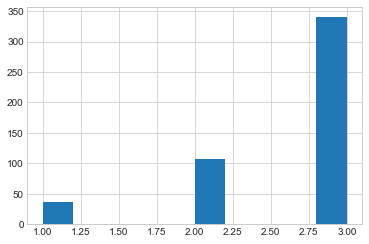

In [109]:
#we have largest number of people from pclass-3
data['Pclass'].hist()

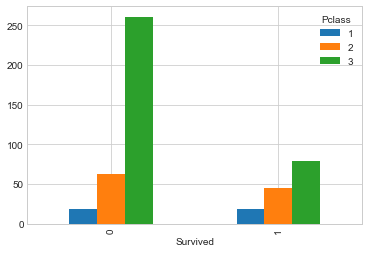

In [110]:
#Pclass and survival
#Graphical
data.groupby('Pclass').Survived.value_counts().unstack(0).plot.bar()

In [111]:
#mathematical
surv = data[data['Survived'] == 1]
surv_p1,surv_p2,surv_p3= surv[surv['Pclass'] == 1],surv[surv['Pclass'] == 2],surv[surv['Pclass'] == 3]
print('survived-----p1',len(surv_p1)/len(surv)*100,'--p2',len(surv_p2)/len(surv)*100,'--p3',len(surv_p3)/len(surv)*100)

non_surv = data[data['Survived'] == 0]
##print(non_surv[non_surv['Pclass'] == 1])
non_surv_p1,non_surv_p2,non_surv_p3= non_surv[non_surv['Pclass'] == 1],non_surv[non_surv['Pclass'] == 2],non_surv[non_surv['Pclass'] == 3]
print('non-survived ---p1',len(non_surv_p1)/len(non_surv)*100,'--p2',len(non_surv_p2)/len(non_surv)*100,'--p3',len(non_surv_p3)/len(non_surv)*100)


survived-----p1 12.676056338028168 --p2 31.690140845070424 --p3 55.633802816901415
non-survived ---p1 5.263157894736842 --p2 18.421052631578945 --p3 76.31578947368422


## Insight
out of all the classes P3 survived the most

Text(0, 0.5, 'avergae Fare')

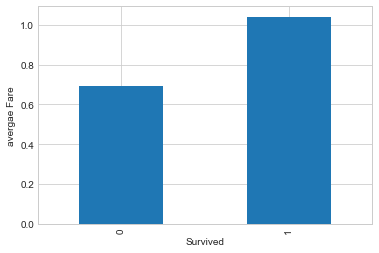

In [113]:
data.groupby('Survived').Fare.mean().plot.bar()
plt.ylabel('avergae Fare')

In [114]:
#Fare and survival
surv = data[data['Survived'] == 1]
non_surv = data[data['Survived'] == 0]
print('mean fare of non-survivors-- ',non_surv['Fare'].mean(),'\nmean fare of survivors --',surv['Fare'].mean())



mean fare of non-survivors--  0.6929824561403509 
mean fare of survivors -- 1.0422535211267605


## Insight
Looks like survivors paid more fare

## Is there any relation b/w passenger fare and survival

Text(0, 0.5, 'Fare greater than mean')

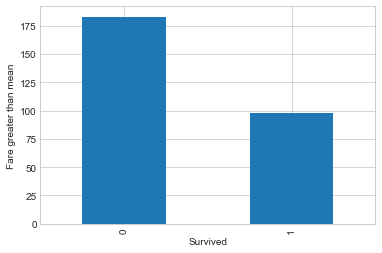

In [116]:
#get dataframe having fare > mean fare,and see how many such people who payed more fare survived
tmp = pd.DataFrame(data[data['Fare'] > data['Fare'].mean()].Survived, columns = ['Survived'])
tmp.groupby('Survived').Survived.count().plot.bar()
plt.ylabel('Fare greater than mean')

In [117]:
#mathematical proof
passenger_paid_more_than_avg = data[data['Fare'] >data['Fare'].mean()]
passenger_paid_less_than_avg = data[data['Fare'] < data['Fare'].mean()]
surv_passenger_paid_more_than_avg = passenger_paid_more_than_avg[passenger_paid_more_than_avg['Survived'] == 1]
non_surv_passenger_paid_more_than_avg = passenger_paid_more_than_avg[passenger_paid_more_than_avg['Survived'] == 0]
surv_passenger_paid_less_than_avg = passenger_paid_less_than_avg[passenger_paid_less_than_avg['Survived'] == 1]
print('People who paid more than avg fare and did not survived--',len(non_surv_passenger_paid_more_than_avg))
print('People who paid more than avg fare and did survived--',len(surv_passenger_paid_more_than_avg))

People who paid more than avg fare and did not survived-- 183
People who paid more than avg fare and did survived-- 98


Text(0, 0.5, 'Fare lesser than mean')

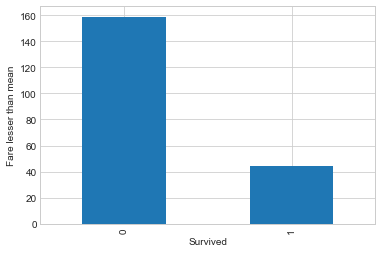

In [118]:
#get dataframe having fare < avg fare,and see how many such people who payed more fare survived
tmp = pd.DataFrame(data[data['Fare'] < data['Fare'].mean()].Survived, columns = ['Survived'])
tmp.groupby('Survived').Survived.count().plot.bar()
plt.ylabel('Fare lesser than mean')

## Insight:
Not much of a difference,both looks same .Fare is not that significant

In [120]:
continous_names, cat_names = get_col_names(data)
print('-----Summary of columns')
print('Total col -',data.shape[1] )
print('continous are -', len(continous_names))
print(data[continous_names].head(1))
print('-----')
print('categorical are -', len(cat_names))
print(data[cat_names].head(1))

-----Summary of columns
Total col - 8
continous are - 5
   Survived  Pclass  Age  Fare  family_size
0         0       3  1.0   0.0            2
-----
categorical are - 3
    Sex Embarked is_alone
0  male        S        0


## Normalization

In [ ]:
#TBD

In [389]:
#lets drop ticket
if 'Ticket' in cat_names:
    for i,dataset in enumerate(full_data):
        dataset = dataset.drop(['Ticket'], axis=1)
        if i == 0:#updae back
            data = dataset
        else:
            test = dataset
    full_data = [data,test]#full update
    cat_names.remove('Ticket')

In [409]:
#Categ to dummy
for i,dataset in enumerate(full_data):
    dataset = pd.get_dummies(dataset, columns=['Age','Fare'])
    if i == 0:#updae back
        data = dataset
    else:
        test = dataset
full_data = [data,test]#full update

In [410]:
#data=data.drop('Name',axis=1)

full_data = [data,test]
data.shape
data.head(2),cat_names

(   Survived  Pclass  family_size  Sex_female  Sex_male  Embarked_C  \
 0         0       3          2.0           0         1           0   
 1         1       1          2.0           1         0           1   
 
    Embarked_Q  Embarked_S  is_alone_0  is_alone_1  ...  Age_children  \
 0           0           1           1           0  ...             0   
 1           0           0           1           0  ...             0   
 
    Age_middle age  Age_retired  Age_senior  Age_teens  Fare_extremely_high  \
 0               0            0           0          0                    0   
 1               1            0           0          0                    1   
 
    Fare_extremely_low  Fare_high  Fare_low  Fare_medium  
 0                   1          0         0            0  
 1                   0          0         0            0  
 
 [2 rows x 21 columns], ['Sex', 'Embarked', 'is_alone', 'Age', 'Fare'])

In [402]:
#Saving for future purpose
data.to_csv(processed_data_path,index=False)
#data = pd.read_csv(processed_data_path)
data.head(1),data.shape
 



(   Survived  Pclass     Age           Fare  family_size  Sex_female  Sex_male  \
 0         0       3  adults  extremely_low          2.0           0         1   
 
    Embarked_C  Embarked_Q  Embarked_S  is_alone_0  is_alone_1  
 0           0           0           1           1           0  , (891, 12))

## Model Training
We need to split our data for taining and testing
Way1 is using random sampling
Way2 is using Kfolds

In [128]:
#Way 1: Directly using train_test_split

iv = data.drop(['Survived'],axis=1)
dv=data['Survived'].values
iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2)#way 1

model = RandomForestClassifier().fit(iv_train,dv_train)
print('accuracy ' ,model.score(iv_test,dv_test))

accuracy  0.7835051546391752


C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



## For Kfolds, I declared a helper class to test my model

In [216]:
#class to extend sklearn classifier
class sklearnHelper(object):
    def __init__(self, clf, seed = 0, params = None):
        if(params):
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def train(self, train_iv, train_dv):
        self.clf.fit(train_iv, train_dv)#train on training data
    def predict(self, test_iv):
        return self.clf.predict(test_iv)
    def feature_importances(self,x, y):
        return self.clf.fit(x,y).feature_importances_
    
        

In [217]:
#parameter initialization block
rf_params = {
    'n_estimators': 500,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose':0
}
# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }
SEED = 0#for reprducibility
NFOLDS = 5 #set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS)

In [218]:
#Since we have the helper class declared, we can call same class with object of respective class, initialize the parameters
#and get the object indentifier for each classifier being passed
rf = sklearnHelper(clf = RandomForestClassifier, seed = SEED, params = rf_params)
svc = sklearnHelper(clf=SVC, seed=SEED, params=svc_params)
nb = sklearnHelper(clf=GaussianNB, seed=SEED, params=None)

In [219]:
#Way 2: Using KFolds
def get_oof(clf, iv, dv,classifier = None):
    i = 0
    avg_score = 0
    it_score = 0
    for train_index,test_index in kf.split(range(data.shape[0])):
        iv_train, iv_test, dv_train,dv_test = iv[train_index], iv[test_index]\
                                ,dv[train_index], dv[test_index]
            
        clf.train(iv_train, dv_train)#Train
        dv_test_pred = clf.predict(iv_test)#predict
        it_score = sklearn.metrics.accuracy_score(dv_test, dv_test_pred)#score
        avg_score += it_score#calculate average
        #if(classifier):
        #   print( clf.feature_importances(iv_train, dv_train))
        print(it_score)#print for reference
    return avg_score/NFOLDS

"""This method take a dic as input and calculates the key with maximum value"""
def get_max(result):
    print(result)
    max = 0
    for item in result.values():
        if max < item:
            max = item
    return max


In [429]:
iv = data.drop(['Survived'], axis =1).values #for kfolds, use arrays
dv = data['Survived'].values

print('RandomForest-------')
rf_avg_score = get_oof(rf, iv, dv,'rf')
print('Average rf score', rf_avg_score)

print('SVC-----------------')
svm_avg_score = get_oof(svc, iv, dv)
print('Average svm score', svm_avg_score)
print("Training complete")

print('Naive Bayes--------')
nb_avg_score = get_oof(nb, iv, dv)
print('Average naive bayes score', nb_avg_score)
print("Training complete")

result = {'RandomForestClasssifier':rf_avg_score,
         'svm':svm_avg_score,
         'naive bayes': nb_avg_score
         }

upd_result = dict((val,key) for key,val in result.items())#create a dic by rev 'result' pairs and extracting key with max value
print('%%%%%%%%%% BEST model :',upd_result[get_max(result)] ,'-----score',get_max(result))
      


RandomForest-------
0.8324022346368715
0.8314606741573034
0.8258426966292135
0.7921348314606742
0.8595505617977528
Average rf score 0.8282781997363632
SVC-----------------
0.8100558659217877
0.8033707865168539
0.7808988764044944
0.7359550561797753
0.8033707865168539
Average svm score 0.786730274307953
Training complete
Naive Bayes--------
0.6368715083798883
0.7865168539325843
0.8033707865168539
0.7528089887640449
0.8314606741573034
Average naive bayes score 0.762205762350135
Training complete
{'RandomForestClasssifier': 0.8282781997363632, 'svm': 0.786730274307953, 'naive bayes': 0.762205762350135}
{'RandomForestClasssifier': 0.8282781997363632, 'svm': 0.786730274307953, 'naive bayes': 0.762205762350135}
%%%%%%%%%% BEST model : RandomForestClasssifier -----score 0.8282781997363632


## Plot heatmap for the cleaned data

In [158]:
#Let's check the summary of columns
continous_names, cat_names = get_col_names(data)
print('-----Summary of columns')
print('Total col -',data.shape[1] )
print('continous are -', len(continous_names))
print(data[continous_names].head(1))
print('-----')
print('categorical are -', len(cat_names))
print(data[cat_names].head(1))

-----Summary of columns
Total col - 12
continous are - 12
   Survived  Pclass  Age  Fare  family_size  Sex_female  Sex_male  Embarked_C  \
0         0       3  1.0   0.0            2           0         1           0   

   Embarked_Q  Embarked_S  is_alone_0  is_alone_1  
0           0           1           1           0  
-----
categorical are - 0
Empty DataFrame
Columns: []
Index: [0]


AxesSubplot(0.125,0.1925;0.62x0.62)


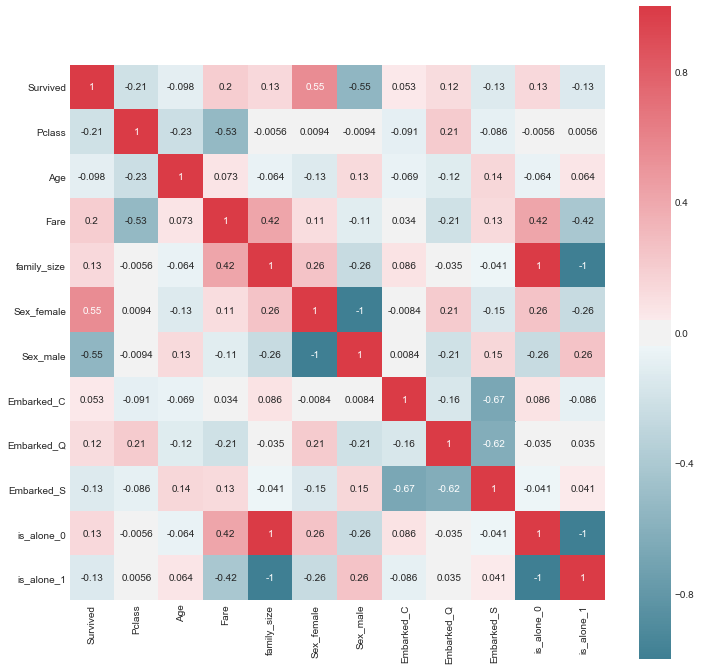

In [159]:
f,ax=plt.subplots(figsize=(12,12))
corr = data.loc[:,continous_names].corr()
print(sb.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sb.diverging_palette(220,10,as_cmap=True),
            square =True,ax=ax,annot = True))

## FINDING
Sex_male and sex_female are negatively and positively related with Survival rate, indicating females 
survived more than men

## Plot feature importances in randomforest
We selected SVM, but just for info sake lets plot this also

In [221]:
iv = data.drop(['Survived'],axis=1)
dv=data['Survived'].values
iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2,random_state=42)#way 1
model = RandomForestClassifier().fit(iv_train, dv_train)
#f = pd.DataFrame(model.feature_importances_.reshape(1,-1),columns=data.drop(['Survived'],axis=1).columns.values)
cols = data.drop(['Survived'],axis=1).columns
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': model.feature_importances_})
feature_dataframe.head(1)
#data.drop(['Survived'],axis=1).columns
#model.feature_importances_.reshape(1,-1)


,features,Random Forest feature importances
0,Pclass,0.099112


In [222]:
model.feature_importances_

array([0.09911205, 0.24976112, 0.27053229, 0.0247018 , 0.20651335,
       0.0858613 , 0.00945707, 0.00662866, 0.01933764, 0.0146237 ,
       0.01347101])

In [223]:
iv_train.columns

Index(['Pclass', 'Age', 'Fare', 'family_size', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'is_alone_0', 'is_alone_1'],
      dtype='object')

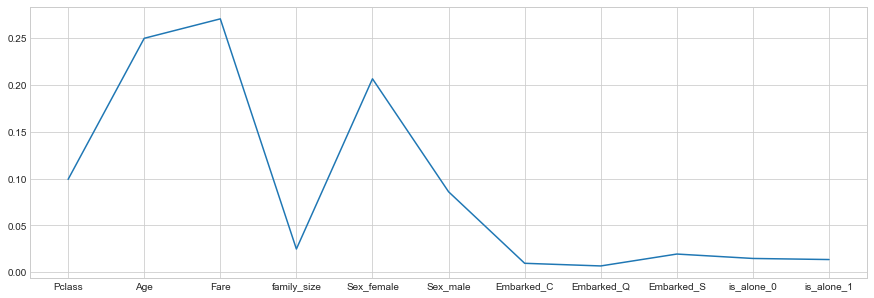

In [228]:
f,ax=plt.subplots(figsize=(15,5))
plt.plot(list(feature_dataframe.features),list(feature_dataframe['Random Forest feature importances']))

In [164]:
#model.feature_importances_

trace = go.Scatter(y = feature_dataframe['Random Forest feature importances'].values,
                  x = feature_dataframe['features'].values,
                  mode = 'markers',
                  marker = dict(sizemode = 'diameter', sizeref = 1,size = 25,
                                color = feature_dataframe['Random Forest feature importances'].values,
                                colorscale='Portland',showscale=True),
                  text = feature_dataframe['features'].values)
layout = go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig,filename='scatter2010')

## FINDING
sex_male and sex_female are pretty important feature, lets check their corr with Survived

In [176]:
#Now that we know SVM fits better, we can use all of the train data to feed the model
 
iv = data.drop(['Survived'],axis=1)
dv=data['Survived'].values
iv_test = test.drop(['Survived'],axis=1)
#iv_test = pd.read_csv(test_data_path)
model = SVC().fit(iv,dv)#Train the model using full training excel
#Let's predict for actual test data
dv_test_pred = model.predict(iv_test)
iv_test['Survived'] = dv_test_pred

#write back the results
iv_test.to_csv(submitted_data_path,index=False)



C:\Users\PAT\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



# Randomforest - Hyper-paramter tuning

In [411]:
#Way 1: Directly using train_test_split

iv = data.drop(['Survived'],axis=1)
dv=data['Survived'].values
iv_train, iv_test, dv_train,dv_test = train_test_split(iv,dv, test_size = 0.2,random_state=42)#way 1

model = RandomForestClassifier(n_estimators=100,random_state=42,oob_score=True).fit(iv_train,dv_train)
print('accuracy ' ,model.score(iv_test,dv_test))

accuracy  0.8603351955307262


In [412]:
model.oob_score_

0.7963483146067416

In [151]:
from sklearn.metrics import roc_auc_score

In [413]:
roc_auc_score(dv_test,model.predict(iv_test))

0.851029601029601

## no of estimators

50 0.851029601029601 0.8603351955307262
100 0.851029601029601 0.8603351955307262
150 0.8557915057915059 0.8659217877094972
200 0.8557915057915059 0.8659217877094972
500 0.8693050193050194 0.8770949720670391
1000 0.8645431145431145 0.8715083798882681


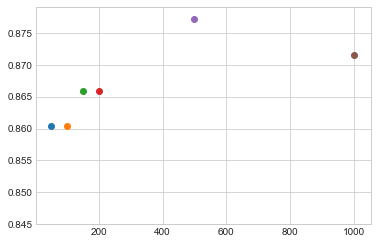

In [414]:
trees = [50,100,150,200,500,1000]
plot_ = {}
for t in trees:
    model = RandomForestClassifier(n_estimators=t,random_state=42).fit(iv_train,dv_train)
    plot_[t] = model.score(iv_test,dv_test)
    print(t,roc_auc_score(dv_test,model.predict(iv_test)),plot_[t])
    plt.scatter(t,plot_[t])


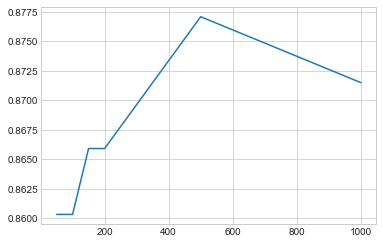

In [415]:
plt.plot(list(plot_.keys()),list(plot_.values()))

#### finalize
no of trees = 500 seems to give the best result

We can try with max_features also

auto 0.8557915057915059 0.8659217877094972
log2 0.8557915057915059 0.8659217877094972
sqrt 0.8557915057915059 0.8659217877094972
4 0.8557915057915059 0.8659217877094972
5 0.8557915057915059 0.8659217877094972
6 0.8557915057915059 0.8659217877094972


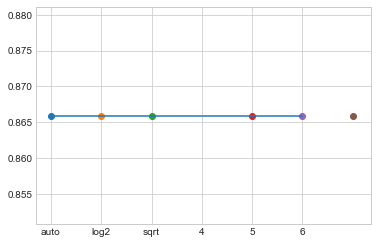

In [416]:
max_features = ['auto','log2','sqrt',4,5,6]
plot_ = {}
for max_f in max_features:
    model = RandomForestClassifier(n_estimators=200,max_features=max_f,random_state=42).fit(iv_train,dv_train)
    plot_[max_f] = model.score(iv_test,dv_test)
    print(max_f,roc_auc_score(dv_test,model.predict(iv_test)),plot_[max_f])
    plt.scatter(max_f,plot_[max_f])
plt.plot(list(plot_.keys()),list(plot_.values()))

#### finalize
max_features gives best at 8 features max

accuracy  0.8603351955307262


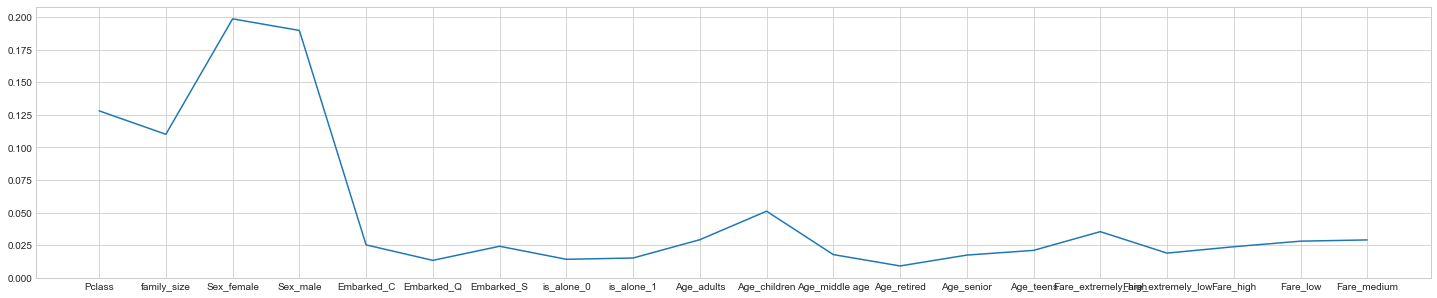

In [428]:
model = RandomForestClassifier(n_estimators=500).fit(iv_train,dv_train)
print('accuracy ' ,model.score(iv_test,dv_test))
feature_dataframe = pd.DataFrame( {'features': iv_train.columns,
     'Random Forest feature importances': model.feature_importances_})

f,ax = plt.subplots(figsize=(25,5))
plt.plot(list(feature_dataframe.features),list(feature_dataframe['Random Forest feature importances']))

# RESULT of model analysis
Sex determined the survival rate the most(females the most), followed by Passengerclass(pclass=1), then family size(3,4,5) were the most important features

Model performs poor(0.79) without age and Fare properly cleaned(converting continous range to discrete categories). These both are the key features of this accurate prediction and needs to be handled properly

When age and fare was continous variables, trees would be having if else conditions and more the range, more the branches/splits would be there and the significance of that variable gets reduced

Hence when you have a numeric variable with fewer number of values, its best to convert to str type(object) and treat it accordingly, which results in better predictions(since these variables were significant)

Hyper-parameter tuning also helps in getting better perfomance